
### 1) Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all the points in the training set as centers of the RB functions. Compare the performance results (mean square error) as you vary the spread parameter while keeping it the same for all kernel functions. Discuss your findings?

In [1]:
# Importing Librariess
import numpy as np
from numpy.linalg import norm, pinv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#### Radial basis function network (RBFN) represent a special category of the feedforward neural networks architecture. It consists of an input layer, a single hidden layer with radial activation function (Gaussian) and an output layer.

In [ ]:
# Getting Data by Random Sampling

input = []
output = []

for i in range (441):
    xi = np.random.randint(0,21)
    xj = np.random.randint(0,21)

    x1 = -2 + 0.2*xi
    x2 = -2 + 0.2*xj
    
    if ((x1*x1 + x2*x2) <=1):
        output.append(1)
    else:
        output.append(-1)
        
    input.append([x1,x2])
    
input = np.array(input)
output = np.array(output)


In [ ]:
#Splitting the data into training and validation set in a ratio of 8:2
train_input, test_input, train_output, test_output = train_test_split(input, output, test_size = 0.2)

In [ ]:
sigma_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,20,50,100]

#### The connection weights between the input layer and the neuron units of the hidden layer for an RBFN are all equal to unity. Weights exist only between the hidden layer and the output layer.

#### Pseudo-inverse method to calculate the weight matrix.

$\ W = G^+ D $
#### where
$\ G^+=(G^TG)^{-1}G^T $

In [ ]:
# Weights Calclulation
def cal_weight(input,centers,si,output):
    G = gaussian(input,centers,si)
    W = np.dot(pinv(G),output)
    
    return W   

#### The Gaussian kernel function is the most widely used form of RBF given by
$\ g_{i}(x) = \frac{1}{1+exp{\frac{\lVert x-v_{i} \rVert}{𝜎^2_{i}}}} $

In [ ]:
# Calculating Gaussian Matrix 
def gaussian(input,centers,si):

    gauss = np.zeros((input.shape[0],centers.shape[0]), dtype = float)
    for index_i, i in enumerate(centers):
        for index_j, j in enumerate(input):
            g = np.exp(-(norm(j-i)**2)/(2*si*si))
            gauss[index_j,index_i] = g
            
    return gauss       

In [ ]:
# Output Calculation
def cal_output(input,centers,sigma,w):
    
    G_test = gaussian(input,centers,sigma)
    output = np.dot(G_test,w)
    return output

In [ ]:
# Mean Square Error
def Mean_sq_err(y_true,y_pred):
    return (np.square(y_true- y_pred).mean())

# Accuracy
def accuracy_score(y_true,y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Training the data with complete train_input as centers
error_values_full = []
test_accuracy_values_full = []
train_accuracy_values_full = []

for i in sigma_values: 
    weight = cal_weight(train_input,train_input,i,train_output)
    y_value = cal_output(test_input,train_input,i,weight)
    y_pred = np.sign(y_value)

    # Error
    error = Mean_sq_err(test_output,y_pred)
    error_values_full.append(error)

    # Accuracy
    test_accuracy_full = accuracy_score(test_output,y_pred)
    test_accuracy_values_full.append(test_accuracy_full)
    
    train_accuracy_full = accuracy_score(train_output,np.sign(cal_output(train_input,train_input,i,weight)))
    train_accuracy_values_full.append(train_accuracy_full)

    train_accuracy_list_full=train_accuracy_values_full
    accuracy_list_full=test_accuracy_values_full
    cost_list_full=error_values_full

    print("sigma = {:.3f} \t MSE = {:.3f} \t Training Accuracy = {:.3f} \t Testing Accuracy = {:.3f}".format(i,error,train_accuracy_full,test_accuracy_full))

sigma = 0.100 	 MSE = 0.000 	 Training Accuracy = 1.000 	 Testing Accuracy = 1.000
sigma = 0.200 	 MSE = 0.000 	 Training Accuracy = 1.000 	 Testing Accuracy = 1.000
sigma = 0.300 	 MSE = 0.090 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.978
sigma = 0.400 	 MSE = 0.449 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.888
sigma = 0.500 	 MSE = 0.539 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.865
sigma = 0.600 	 MSE = 0.674 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.831
sigma = 0.700 	 MSE = 0.719 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.820
sigma = 0.800 	 MSE = 0.629 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.843
sigma = 0.900 	 MSE = 0.494 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.876
sigma = 1.000 	 MSE = 0.225 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.944
sigma = 2.000 	 MSE = 0.090 	 Training Accuracy = 0.994 	 Testing Accuracy = 0.978
sigma = 3.000 	 MSE = 0.090 	 Training Accuracy = 0.994 	 Testing Accuracy = 0.978
sigm

<function matplotlib.pyplot.show>

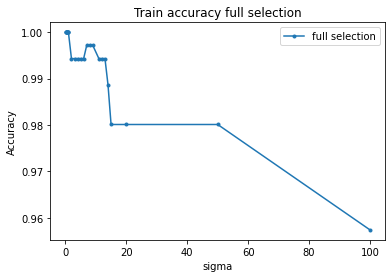

In [ ]:
# Plotting Training Acccuracy for Full Selection
plt.plot(sigma_values,train_accuracy_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy full selection')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

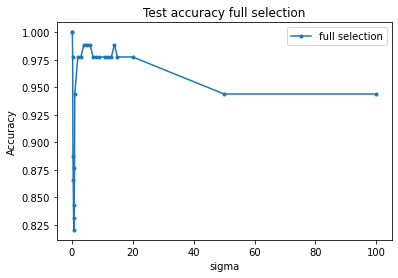

In [ ]:
# # Plotting Test Acccuracy for Full Selection
plt.plot(sigma_values,accuracy_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy full selection')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

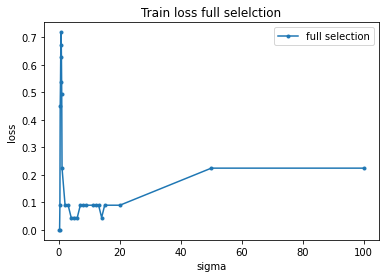

In [ ]:
# Plotting Train Loss for Full Selection
plt.plot(sigma_values,cost_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss full selelction')
plt.legend()
plt.show

In the hidden layer, RBF performs a nonlinear transformation to convert low-dimensional space to high-dimensional space, allowing it to be easily identified. The gaussian function is a nonlinear transformation that was used in this scenario. The RBFN determines the centres using an unsupervised method and calculates the weights using a supervised method.

Based on the implementation and graph acquired, the accuracy in this example is 100% when the sigma value is 0.1, although it is observed that the network did not perform consistently when the sigma value is modified. The reason for this is that a lower width didn't allow for good function interpolation between sample points.

However, a sigma value of 2 and 14 typically offered good accuracy. When the sigma value is 2, this implementation achieves an accuracy of 98.9%. This demonstrates that when sigma is 2, the network is offered with an acceptable interpolation property.

Even a large sigma number performs better in this scenario, although this is not optimal for all runs because information may be lost when the radial functions' ranges are further away from the function's initial range. It's also worth noting that, because it's an exponential function, accuracy almost saturates at a spread value of 20.

As a result of the above evaluation, I have decided on a mid-range sigma value of 2 with an accuracy of 98.9% as best width value.

## 2) Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches


### a) Randomly select the centers from the input data.

In [ ]:
# Randomly selecting 150 centers
random_index = np.random.choice(train_input.shape[0], size=150, replace=False)
random_centers = train_input[random_index,:]

In [ ]:
# Training the data with 150 centers randomly selected
error_rc_values = []
test_accuracy_rc_values = []
train_accuracy_rc_values = []

for i in sigma_values: 
    weight = cal_weight(train_input,random_centers,i,train_output)
    y_value = cal_output(test_input,random_centers,i,weight)
    y_pred = np.sign(y_value)

    # Error
    error = Mean_sq_err(test_output,y_pred)
    error_rc_values.append(error)

    # Accuracy
    test_accuracy_rc = accuracy_score(test_output,y_pred)
    test_accuracy_rc_values.append(test_accuracy_rc)
    
    train_accuracy_rc = accuracy_score(train_output,np.sign(cal_output(train_input,random_centers,i,weight)))
    train_accuracy_rc_values.append(train_accuracy_rc)

    train_accuracy_list_random=train_accuracy_rc_values
    accuracy_list_random=test_accuracy_rc_values
    cost_list_random=error_rc_values

    print("sigma = {:.3f} \t MSE = {:.3f} \t Training Accuracy = {:.3f} \t Testing Accuracy = {:.3f}".format(i,error,train_accuracy_rc ,test_accuracy_rc ))

sigma = 0.100 	 MSE = 0.045 	 Training Accuracy = 0.991 	 Testing Accuracy = 0.989
sigma = 0.200 	 MSE = 0.090 	 Training Accuracy = 0.997 	 Testing Accuracy = 0.978
sigma = 0.300 	 MSE = 0.000 	 Training Accuracy = 1.000 	 Testing Accuracy = 1.000
sigma = 0.400 	 MSE = 0.000 	 Training Accuracy = 1.000 	 Testing Accuracy = 1.000
sigma = 0.500 	 MSE = 0.000 	 Training Accuracy = 1.000 	 Testing Accuracy = 1.000
sigma = 0.600 	 MSE = 0.000 	 Training Accuracy = 0.997 	 Testing Accuracy = 1.000
sigma = 0.700 	 MSE = 0.045 	 Training Accuracy = 0.997 	 Testing Accuracy = 0.989
sigma = 0.800 	 MSE = 0.045 	 Training Accuracy = 0.997 	 Testing Accuracy = 0.989
sigma = 0.900 	 MSE = 0.090 	 Training Accuracy = 0.997 	 Testing Accuracy = 0.978
sigma = 1.000 	 MSE = 0.090 	 Training Accuracy = 0.997 	 Testing Accuracy = 0.978
sigma = 2.000 	 MSE = 0.135 	 Training Accuracy = 0.994 	 Testing Accuracy = 0.966
sigma = 3.000 	 MSE = 0.090 	 Training Accuracy = 0.994 	 Testing Accuracy = 0.978
sigm

<function matplotlib.pyplot.show>

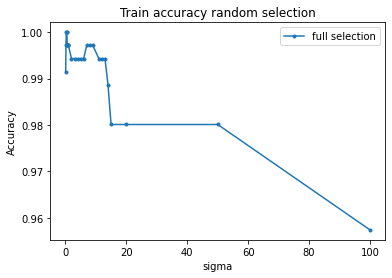

In [ ]:
# Plotting Training Acccuracy for random Selection
plt.plot(sigma_values,train_accuracy_list_random,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy random selection')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

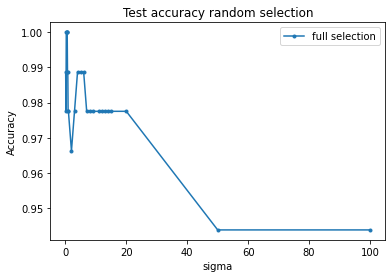

In [ ]:
# Plotting Test Acccuracy for random Selection
plt.plot(sigma_values,accuracy_list_random,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy random selection')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

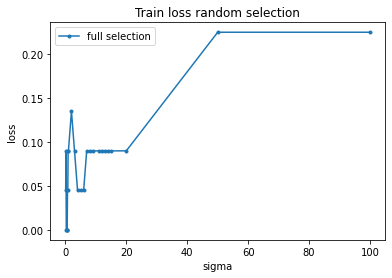

In [ ]:
# Plotting Train Loss for random Selection
plt.plot(sigma_values,cost_list_random,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss random selection')
plt.legend()
plt.show

### b) Use K-Means algorithm to find the centers. You can use a Kmeans function defined in sklearn

In [ ]:
# Using K-Means algorithm to find the centers
kmeans = KMeans(n_clusters = 150)
kmeans.fit(train_input)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=150, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping  clusters where each data point belongs to only one group.  It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

In [ ]:
# Centers
kmean_center = kmeans.cluster_centers_

In [ ]:
# Training the data with centers obtained from Kmeans
error_kmeans_values = []
test_accuracy_kmeans_values = []
train_accuracy_kmeans_values = []

for i in sigma_values: 
    weight = cal_weight(train_input,kmean_center,i,train_output)
    y_value = cal_output(test_input,kmean_center,i,weight)
    y_pred = np.sign(y_value)

    # Error
    error = Mean_sq_err(test_output,y_pred)
    error_kmeans_values.append(error)

    # Accuracy
    test_accuracy_kmeans = accuracy_score(test_output,y_pred)
    test_accuracy_kmeans_values.append(test_accuracy_kmeans)
    
    train_accuracy_kmeans = accuracy_score(train_output,np.sign(cal_output(train_input,kmean_center,i,weight)))
    train_accuracy_kmeans_values.append(train_accuracy_kmeans)

    train_accuracy_list_kmean=train_accuracy_kmeans_values
    accuracy_list_kmean=train_accuracy_kmeans_values
    cost_list_kmean=error_kmeans_values

    print("sigma = {:.3f} \t MSE = {:.3f} \t Training Accuracy = {:.3f} \t Testing Accuracy = {:.3f}".format(i,error,train_accuracy_kmeans,test_accuracy_kmeans))

sigma = 0.100 	 MSE = 0.090 	 Training Accuracy = 0.986 	 Testing Accuracy = 0.978
sigma = 0.200 	 MSE = 0.045 	 Training Accuracy = 0.994 	 Testing Accuracy = 0.989
sigma = 0.300 	 MSE = 0.000 	 Training Accuracy = 1.000 	 Testing Accuracy = 1.000
sigma = 0.400 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 0.500 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 0.600 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 0.700 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 0.800 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 0.900 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 1.000 	 MSE = 0.045 	 Training Accuracy = 1.000 	 Testing Accuracy = 0.989
sigma = 2.000 	 MSE = 0.090 	 Training Accuracy = 0.997 	 Testing Accuracy = 0.978
sigma = 3.000 	 MSE = 0.090 	 Training Accuracy = 0.994 	 Testing Accuracy = 0.978
sigm

<function matplotlib.pyplot.show>

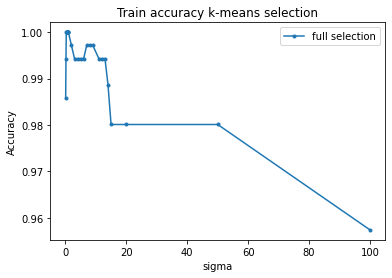

In [ ]:
# Plotting Train Accuracy for Kmeans Selection
plt.plot(sigma_values,train_accuracy_list_kmean,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy k-means selection')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

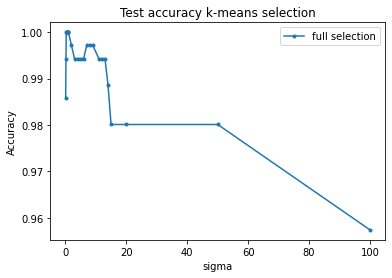

In [ ]:
# Plotting Test Accuracy for Kmeans Selection
plt.plot(sigma_values,accuracy_list_kmean,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy k-means selection')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

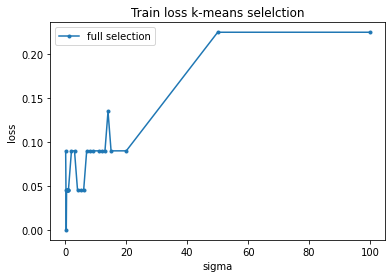

In [ ]:
# Plotting Train Loss for Kmeans Selection
plt.plot(sigma_values,cost_list_kmean,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss k-means selelction')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

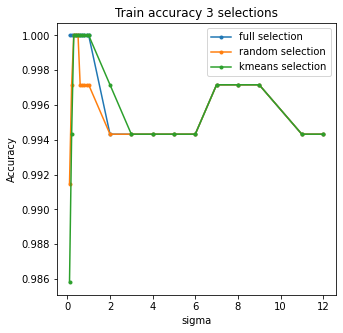

In [39]:
# Plotting Train Accuracy for 3 Selections
plt.figure(figsize=(5,5))
plt.plot(sigma_values[:20],train_accuracy_list_full[:20],marker='.',label="full selection")
plt.plot(sigma_values[:20],train_accuracy_list_random[:20],marker='.',label="random selection")
plt.plot(sigma_values[:20],train_accuracy_list_kmean[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy 3 selections')
plt.legend()
plt.show

Train accuracies are approximately same for higher values of sigma (width)irrespective of different center initialization strategies.

<function matplotlib.pyplot.show>

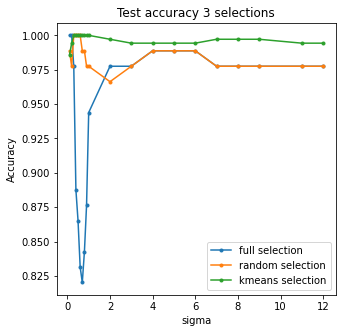

In [40]:
# Plotting Test Accuracy for 3 Selections
plt.figure(figsize=(5,5))
plt.plot(sigma_values[:20],accuracy_list_full[:20],marker='.',label="full selection")
plt.plot(sigma_values[:20],accuracy_list_random[:20],marker='.',label="random selection")
plt.plot(sigma_values[:20],accuracy_list_kmean[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy 3 selections')
plt.legend()
plt.show

If we evaluate these models based on test accuracy we can conclude that k-means clustering to define initial centers works best and has very small effect of change in sigma on performance as compared to fixed point assignment.

<function matplotlib.pyplot.show>

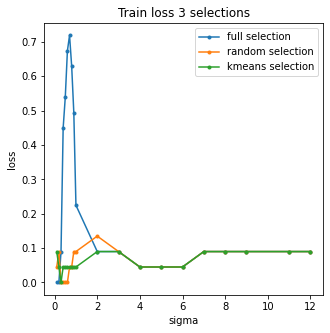

In [41]:
# Plotting Train Loss    for 3 Selections
plt.figure(figsize=(5,5))
plt.plot(sigma_values[:20],cost_list_full[:20],marker='.',label="full selection")
plt.plot(sigma_values[:20],cost_list_random[:20],marker='.',label="random selection")
plt.plot(sigma_values[:20],cost_list_kmean[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss 3 selections')
plt.legend()
plt.show

For full selection of centers, loss changes abruptly with change in values of sigma and follows same tragectory as of other center selection technique for sigma values greater than 2. Losses incurred due to random assignment and k-means center assignment are approximately same as sigma increases. 

Based on the results obtained from random intilization of 150 centres from the entire 352 training data, it sometimes performs better than Kmeans centre, oftentimes performs worse than Kmeans centre, and also sometimes performs the same, but the difference in accuracy between kmeans and random 150 centre initialization is very small.

The hidden layer (i.e. the number of non linear transformations applied) should be equal to the input data length for optimal performance. The performance of a network can be impacted by too sparse functions. When the hidden layer is spread over the input dataspace, the accuracy gained is 98.9%, and when the hidden layer is 150, the network performance remains the same: 98.9% for random centres and 97% percent for k means centres for the same sigma value.

RBF's main idea is to convert low-dimensional data to high-dimensional space for better linear separation (i.e., the higher the dimension, the better the network performance), and the ideal multi-dimensional space for projecting the data is the same as the input dataspace. As a result, when all of the training data is taken as centres, the prospect of stronger linear datapoint separation is achievable due to the higher dimension than 150 centres. The acquired results support these claims.